# TME 10 : Compression d'images avec le codage de Huffman
> Consignes: le fichier **TME10_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en **TME10_nom1_nom2.ipynb**.

N'oubliez pas de sauvegarder fréquemment votre notebook !! ...

Pour chaque questions, écrivez des commentaires brefs et concis lorsque demandé dans les cases **Réponse**.

In [1]:
# Chargement des modules et fonctions utiles.
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from pylab import *


def affichage_14(affichages,titres=None, axis=True):
    # effectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    # paramètres :
    #  - liste des affichages (entre 1 et 4)
    #  - liste des titres (entre 1 et 4, autant que de affichages) Optionnelle
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)>=2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True
        # ne pas afficher les axes si demandé
        if not axis:
            plt.axis('off')

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

def litbit(s,b):
    """ bytearray*int->str
        lit la valeur du bit b dans la table d'octets s
        et retourne '1' ou '0'
    """
    byte , bit = b//8 , 7-b%8
    if s[byte] & (1<<bit):
        return '1'
    else:
        return '0'

def ecritbit(s,b,val):
    """ bytearray*int*str -> NoneType
        len(str) == 1
        écrit la valeur du bit b dans la table d'octets s
    """
    byte , bit = b // 8 , 7 - b % 8
    if val == '1':
        s[byte] = s[byte] | (1<<bit)
    else:
        s[byte] = s[byte] & ~(1<<bit)

## Calcul d'entropie sur des images

Considérons un ensemble d'images en nuances de gris, notre source, et considérons la valeur de leurs pixels comme une variable aléatoire X ($X\in[0,255]$ la plus-part du temps).
On va dans un premier temps calculer l'entropie de X pour différentes sources, i.e différents groupes d'images.

### Question 1 :
1. Charger plusieurs images dans des tableaux ```np.array()``` dont une image binaire (par exemple ``rectangle.png``), puis affichez-les (on pourra grouper les images par groupe de 4 maximum et utiliser la fonction ```affichage_14()```).

2. Calculer l'entropie pour chaque image (une image est vue comme la réalisation d'une variable aléatoire, et donc une suite de symboles). Indication: utiliser la fonction ``np.histogram(img,256)`` du module Numpy. 

3. Quelle différence y a-t-il entre l'entropie de l'image binaire et celle des images non binaires ? Pourquoi ?

### Reponse 1.1
chargement d'images fournies dans les TMEs précédents chacune dans un tableau numpy

In [2]:
## Images en niveau de gris
bur = np.array(Image.open('images/bureau.png'))
cam= np.array(Image.open('images/cameraman.png'))
cible= np.array(Image.open('images/cible.png'))
couloir= np.array(Image.open('images/couloir.png'))
jussieu= np.array(Image.open('images/Jussieu_wikipedia.jpg'))
lune= np.array(Image.open('images/Lune.png'))
chaise =np.array(Image.open('images/chaise.png'))
## Image en couleur
lena= np.array(Image.open('images/lena.png'))
## Images binaires
rectangle = np.array(Image.open('images/rectangle.png'))

In [3]:
## verification des types des images
print(Image.open('images/cameraman.png').mode)
print(Image.open('images/lena.png').mode)
print(Image.open('images/chaise.png').mode)
print(Image.open('images/rectangle.png').mode)

cam.size
#shape(cam)

L
RGB
L
L


65536

### Réponse 1.2
Calcul de l'entropie, il faut rajouter 1O⁻⁶ à toutes les valeurs de l'histogramme pour car log est non défini en 0 et la valeur 10-6 reste négligeable 

In [4]:
def Entropy(img):
    size=img.size
    his, b=np.histogram(img, 256)
    hisnorm=his/np.double(size)
    # le - sert à faire en sorte que res soit positif car log prend des valeurs négatives dans ]0, 1[
    # on divise sur 2 pour avoir log_2
    
    part=- np.log2(hisnorm+1e-10)* hisnorm
    res=part.sum()
    
    return res
    

### Images de tests

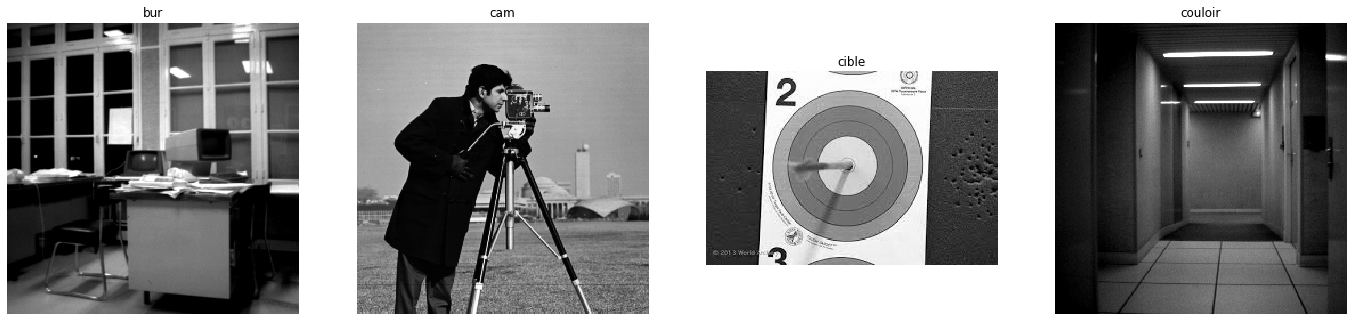

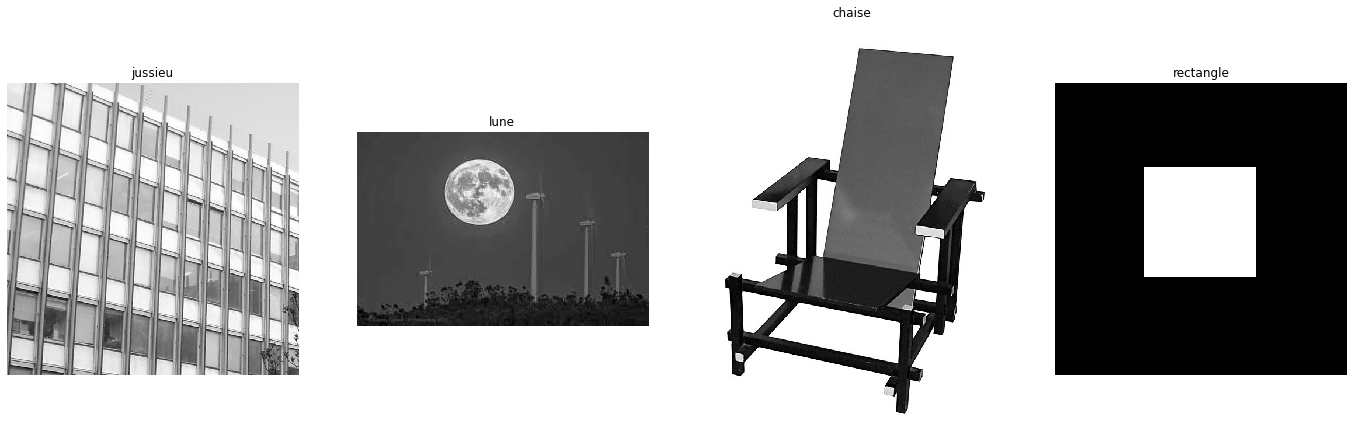

In [5]:
tab1=[bur, cam, cible, couloir, jussieu, lune, chaise ]
affichage_14(tab1[:4], ["bur", "cam", "cible", "couloir"], axis=False)
tab2=[ rectangle]
affichage_14(tab1[4:]+tab2, ["jussieu", "lune", "chaise", "rectangle"], axis=False)


## Tests

In [6]:
print([Entropy(tab1[i]) for i in range(len(tab1))])
print([Entropy(tab2[i]) for i in range(len(tab2))])
print(Entropy(lena))


[6.905430406782132, 7.0097162477109505, 7.258517312809456, 6.083237531330941, 7.414992555496973, 5.020158043726478, 3.6261285340626728]
[0.5934730425386324]
7.75019744324298


### Réponse 1.3


On remarque que l'entropie des images binaire est très petites comparée à celle des images en couleur ou en niveau de gris.  
Ceci est logique car une image binaire n'a comme valeurs que des 0 et des 1, donc avec deux valeurs possibles ,on code les pixels d'une image binaire sur un bit.  

Conclusion:  la compression est très utile appliquée à des images non binaires

## Encodage des pixels avec le code de Huffman
On suppose ici connaître la dimension des images (donc leur nombre de pixels et leur nombre de lignes), et on souhaite encoder ces images en séquences binaires les plus compactes possibles.
On va pour cela utiliser le codage de Huffman.

### Question 2
1. Écrire la fonction ``huffman()`` vue  en TD. 

In [7]:
# type Noeud = tuple[int,float,list[Noeud]]
# hisn: histogramme normalisé de l'image qu'on veut coder
def huffman(hisn):
    """ Array[float] -> Noeud
        construit l'arbre de huffman correspondant a
        l'histogramme normalise hisn et retourne la racine.
    """
    # construction d'un tableau de noeuds en retirant les valeurs de pourcentage nulles
    vp=[(i, hisn[i],[]) for i in range( hisn.size) if hisn[i]>0]
    while(len(vp)>1):
        #tri des noeuds par probabilité d'apparition croissante
        #ce tri doit se faire à chaque itération car on rajoute un nouveau noeud avec une nouvelle proba à chaque noeud
        vp=sorted(vp, key=lambda x:x[1])
        b0, b1=vp[0], vp[1]
        vp=vp[2:]
        
        # on attribue - 1 comme niveau de gris aux noeuds intermédiaires
        vp.append((-1, b0[1]+b1[1], [b0, b1]))
        #l'algorithme termine bien car à chaque itération on retire deux noeud et on en rajoute un seul
    return vp
        
        

2. Testez la sur l'exemple du TD en imprimant l'arbre.

In [8]:
histo_td = np.zeros(256)
for v,f in [(0,12046),(36,3325),(73,2390),(109,8716),(146,19544),(182,18748),(219,594),(255,178)]:
    histo_td[v] = f/65541
### je divise sur 65541 pour avoir les probabilité \in [0, 1]
racine=huffman(histo_td)
print(racine)

[(-1, 1.0, [(-1, 0.4157550235730306, [(0, 0.18379335072702582, []), (-1, 0.23196167284600477, [(-1, 0.09897621336262796, [(-1, 0.04824461024396942, [(-1, 0.01177888649852764, [(255, 0.002715857249660518, []), (219, 0.009063029248867122, [])]), (73, 0.03646572374544178, [])]), (36, 0.05073160311865855, [])]), (109, 0.1329854594833768, [])])]), (-1, 0.5842449764269694, [(182, 0.2860499534642438, []), (146, 0.2981950229627256, [])])])]


### Remarque
Le résultat correspond bien à celui obtenu en TD.

### Question 3
1. Écrire la fonction ```hufftable()``` vu en TD.

In [9]:

#fonction intermédiaire litcode interne, fonction récursive
#table représente pour chaque valeur de l'image son code associé
def hufftable(racine):
    """ Noeud -> dict[int,str] """
    def litcode(nd, code):
        """Noeud*str-> NoneType"""
        val, p, fils=nd
        if(len(fils)>0):
            #var temporaire
            cp=code
            litcode(fils[0], code+'0')
            code=cp
            litcode(fils[1], code+'1')
        else:
        
            table[val]=code
            # appel de la routine del pour détruire l'arbre au fur et à mesure lors du dépilement
            del nd
    #création du dictionnaire de codes
    table=dict()
    litcode(racine,'')
    return table

    

2. Tester la sur l'arbre calculé précédemment et afficher la table

In [10]:
table=hufftable(racine[0])
print( table)

{0: '00', 255: '010000', 219: '010001', 73: '01001', 36: '0101', 109: '011', 182: '10', 146: '11'}


### Commentaire:

La table de Huffman retournée par la fonction correspond à celle trouvée en TD.  
Affichage retourné: {0: '00', 255: '010000', 219: '010001', 73: '01001', 36: '0101', 109: '011', 182: '10', 146: '11'}

### Question 4
1. Écrire la fonction ``encode()`` vue en TD.

In [11]:
# fonction qui encode l'image grâce à la table de Huffman
# retourne un tuple d'un tableau d'octets et la longueur de l'encodage
def encode(img,table):
    """ Array[int] * dict[int,str] -> tuple[bytearray,int]
        Encode l'image img selon la table de Huffman table
        retourne un tableau d'octets et la véritable longueur
        en bit des données encodés
    """
    # initialisation out à la taille maximale possible 
    out=bytearray([0]*img.size)
    nbits=0 #initialisation
    # on transforme l'image en un tableau d'une dimension
    for val in img.reshape(img.size):
        #transformer chque caractère en une séquence de bits
        for s in table[val]:
            ecritbit(out,nbits,s)
            nbits+=1
    return out, nbits

2. Tester la sur la portion d'image utilisée en TD. Afficher la taille en bit avant et après encodage.

In [12]:
img_td = np.array([
    [109, 182, 109, 109, 219, 109, 146, 182], 
    [146, 219, 182, 182, 255, 219, 219, 182],
    [219, 219, 219, 219, 219, 219, 219, 182],
    [36, 182, 73, 73, 219, 73, 109, 182], 
    [36, 146, 73, 73, 182, 73, 109, 182],
    [36, 109, 73, 73, 109, 73, 146, 182],
    [73, 36, 36, 36, 182, 146, 182, 182],
    [182, 146, 146, 146, 182, 182, 182, 182]
],dtype=int)


In [13]:
print("taille avant encodage: ", img_td.size*8, "\n")
bArr,size = encode(img_td,table)
print("taille apres encodage: ", size,"\n")

print("affiche bites: ",bArr)

taille avant encodage:  512 

taille apres encodage:  230 

affiche bites:  bytearray(b'sh\xbe\xd1\xa4\x11FE\x14QE\x14e\x92\x94R\xe5\xd2\x99.V\x94\xb4\xf2UV\xea\xfe\xa8\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


3. Écrire une fonction ``print_encode()`` qui imprime le tampon encodé sous la forme d'une suite de caractères '0' et
'1'. Tester la sur l'exemple précédent.

In [14]:
def print_encoded( encoded, l):
    """ bytearray*int->str"""
    b=""
    for i in range(l):
        b+=litbit(encoded,i)
    
    print(b)
        

In [15]:
## Test
print_encoded(bArr, size)

01110011011010001011111011010001101001000001000101000110010001010001010001010001010001010001010001100101100100101001010001010010111001011101001010011001001011100101011010010100101101001111001001010101010101101110101011111110101010


## Remarque
En comparaison avec le codage fait à la main en TD, on retrouve bien le même résultat

### Question 5
1. Écrire le code de la fonction ```decode()``` vu en TD.

In [16]:

def decode(encoded,shape,table):
    """ bytearray*tuple[int,int]*dict[int,str]->Array[int]
        decode une image de huffman
    """
    out=zeros(shape[0]*shape[1])
    bit=0 # bit courant à décoder
    #on inverse la clé et la valeur du dictionnaire
    tab2={code: val for val,code in table.items()}
    for i in range(out.size):
        code=''
        # tant qu'un code correspondant n'existe pas, on rajoute des caractères
        while not code in tab2:
            code+=litbit(encoded,bit)
            bit+=1
        out[i]=tab2[code]
        #on transforme out en tableau 2 dimensions
    return out.reshape(shape)

2. Tester la sur la portion d''image précédemment encodée et vérifier qu'elle est bien égale à la portion d'image originale.

In [17]:
print(decode(bArr, img_td.shape, table))

[[109. 182. 109. 109. 219. 109. 146. 182.]
 [146. 219. 182. 182. 255. 219. 219. 182.]
 [219. 219. 219. 219. 219. 219. 219. 182.]
 [ 36. 182.  73.  73. 219.  73. 109. 182.]
 [ 36. 146.  73.  73. 182.  73. 109. 182.]
 [ 36. 109.  73.  73. 109.  73. 146. 182.]
 [ 73.  36.  36.  36. 182. 146. 182. 182.]
 [182. 146. 146. 146. 182. 182. 182. 182.]]


Le résultat correspond bien à l'image donné en entrée à encode.

### Question 5: expérimentations

1. Vérifier, pour les trois images, que la compression huffman fonctionne correctement

2. On définit le taux de compression d'une image par : *1 - (taille_bit_code / taille_bit_image) %* Calculez les taux de compression des trois images. Commentez.  
 
3. Quel serait le taux de compression d'une image avec pixels aléatoires de loi uniforme [0,255] ? Quel est le lien avec la valeur de l'entropie des pixels ?

### Remarque:
1 - Pour vérifier si la compression fonctionne correctement, je compresse une image puis je la décompresse et j'affiche le résultat pour voir si c'est la même que l'image de base.

Taux de compression 0.1331310272216797


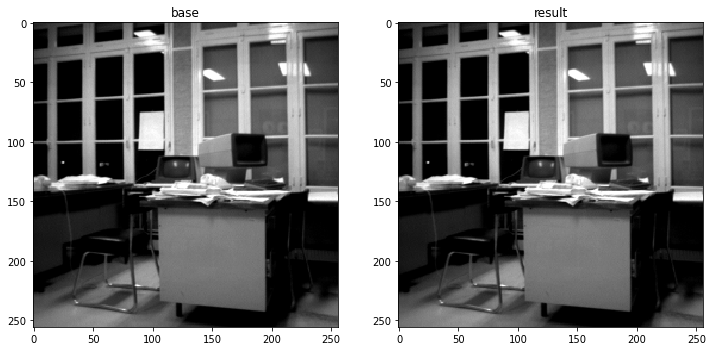

Taux de compression 0.025510787963867188


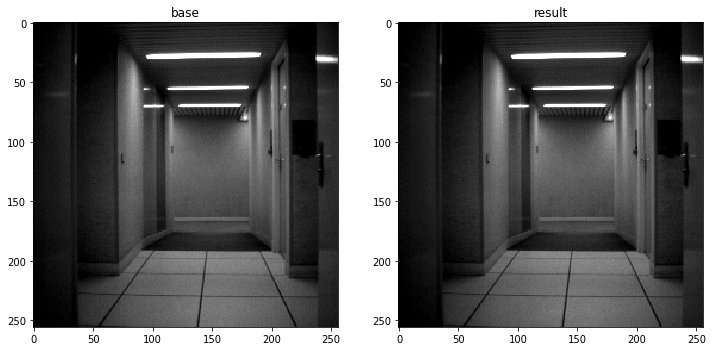

Taux de compression 0.6602783203125


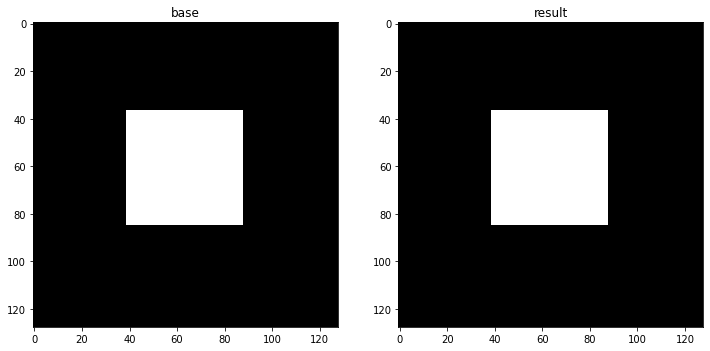

In [18]:
# Réponse questions 5.1 et 5.2


def codedecode(img):
    hisn, b=np.histogram(bur, 256)/np.double(img.size)
    racine=huffman(hisn)
    table=hufftable(racine[0])
    encoded, l=encode(img, table)
    #calcul de taux de compression, on multiplie par 8 car dans les images en niveau de gris il y a 256 valeurs possible
    # donc un pixel est codé sur log2( 256)= 8 bits
    Tcomp=1-l/(img.size*8)    
    print("Taux de compression "+str(Tcomp))
    res=decode(encoded, img.shape, table)
    affichage_14([img, res], ['base', 'result'])
codedecode(bur)
codedecode(couloir)
codedecode(rectangle)

## Commentaire
Le taux de compression le plus élevé est celui de l'image binaire. C'est logique car on passe de 8 bits par pixel à un seul bit.  
Le taux de compression est de 13% pour l'image du bureau et de 2,5% seulement pour l'image du couloir.   
Ce taux même s'il semble petit est important car la taille occupée reste conséquente sur de grosse masse de données d'images.

## Conclusion:
L'image résultante de la compression puis décompression est bien similaire à l'image originelle.

**Réponse question 5.3**  

Le taux de compression d'une image avec pixels aléatoires de loi uniforme [0,255] serait de 0% puisque l'entropie de la variable pixel serait maximale comme vue en TD ( -log2(1/n)) avec n le nombre de valeurs. 
Donc dans notre cas -log2(1/256)=log2(256)=8, et l'image de base étant sur 8 bits, on a bien 0% de taux de compression.  